<a href="https://colab.research.google.com/github/KiranRaghavendra1248/ML-7/blob/master/Fashion_MNIST_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Fashion MNIST using artificial neural nets

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
mnist=keras.datasets.fashion_mnist

In [4]:
type(mnist)

module

In [8]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [10]:
print(X_train.shape , y_train.shape)

(60000, 28, 28) (60000,)


In [11]:
print(X_test.shape , y_test.shape)

(10000, 28, 28) (10000,)


In [12]:
# 28*28 grayscale images

In [13]:
class_names=['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

Dress


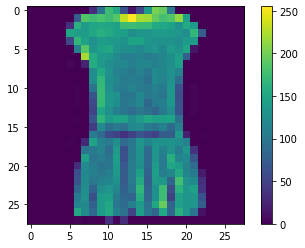

In [19]:
plt.figure()
plt.imshow(X_train[3])
plt.colorbar()
print(class_names[y_train[3]])

In [20]:
#Scaling down

In [21]:
X_train=X_train/255.0
X_test=X_test/255.0

Dress


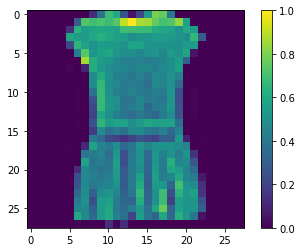

In [22]:
plt.figure()
plt.imshow(X_train[3])
plt.colorbar()
print(class_names[y_train[3]])

In [34]:
from keras.layers import Dense,Flatten,Dropout
from keras import Sequential

In [24]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Loss types:
# 1. Binary cross entropy: Classification with 2 classes
# 2  Categorical cross entropy: Classification with n classes- labels are sparse vectorslabels are integers 0-(n-1)
# 3. Sparse categorical cross entropy : Classification with n classes- labels are integers 0-(n-1)

In [28]:
# Loss : Sparse categorical cross entropy
# Optimizer: Adam
# Metric: Accuracy

In [30]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
model.fit(X_train,y_train,epochs=20)

Epoch 1/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.4991 - accuracy: 0.8238
Epoch 2/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.3750 - accuracy: 0.8656
Epoch 3/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.3374 - accuracy: 0.8762
Epoch 4/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.3131 - accuracy: 0.8844
Epoch 5/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.2959 - accuracy: 0.8909
Epoch 6/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.2819 - accuracy: 0.8954
Epoch 7/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.2686 - accuracy: 0.8992
Epoch 8/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.2571 - accuracy: 0.9040
Epoch 9/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.2479 - accuracy: 0.9071
Epoch 10/20
60000/60000 [=============================

In [32]:
from sklearn.metrics import accuracy_score
y_pred=model.predict_classes(X_test)
score=accuracy_score(y_test,y_pred)
print(score)


0.8876


In [33]:
# Train accuracy 93% and Test accuracy 89%
# Overfitting

In [35]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [38]:
model.fit(X_train,y_train,epochs=20)

Epoch 1/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.5403 - accuracy: 0.8086
Epoch 2/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.4049 - accuracy: 0.8534
Epoch 3/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.3741 - accuracy: 0.8640
Epoch 4/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.3501 - accuracy: 0.8709
Epoch 5/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.3386 - accuracy: 0.8762
Epoch 6/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.3239 - accuracy: 0.8807
Epoch 7/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.3151 - accuracy: 0.8850
Epoch 8/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.3036 - accuracy: 0.8873
Epoch 9/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.2967 - accuracy: 0.8910
Epoch 10/20
60000/60000 [===========================

In [40]:
y_pred=model.predict_classes(X_test)
score=accuracy_score(y_test,y_pred)
print(score)

0.886


In [41]:
# Adding dropout regularization seems to reduce vale of test and train acccuracy both. Hopefully CNN does better.